In [1]:
# 설치 후 반드시 [세션 다시 시작] 메뉴를 실행해주어야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
# 한글 폰트 사용시, 마이너스 글자가 깨지는 현상을 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
drive_path = '/gdrive/My Drive/'

In [5]:
파일데이터 = open(drive_path + '국민건강보험공단_건강검진정보_2023.csv', encoding='cp949')

import csv

중간결과 = csv.reader(파일데이터)

리스트표 = list(중간결과)

In [6]:
def convert_column_to_numeric(data, column_index):
    """
    특정 열(column_index)의 값을 숫자형으로 변환합니다.

    :param data: 2차원 리스트
    :param column_index: 변환할 열의 인덱스 (0부터 시작)
    :return: 변환된 2차원 리스트
    """
    for row in data:
        try:
            # 해당 열의 값을 숫자형으로 변환
            value = row[column_index]
            row[column_index] = float(value) if '.' in value else int(value)
        except ValueError:
            # 변환 불가능한 경우 기존 값 유지
            pass
    return data

In [7]:
리스트표[0][0] = 리스트표[0][0].replace('\ufeff', '')

In [8]:
# 예제 실행: 0번째 열과 1번째 열을 숫자로 변환
리스트표 = convert_column_to_numeric(리스트표, 0)
리스트표 = convert_column_to_numeric(리스트표, 1)
리스트표 = convert_column_to_numeric(리스트표, 2)
리스트표 = convert_column_to_numeric(리스트표, 3)
리스트표 = convert_column_to_numeric(리스트표, 4)
리스트표 = convert_column_to_numeric(리스트표, 5)
리스트표 = convert_column_to_numeric(리스트표, 6)
리스트표 = convert_column_to_numeric(리스트표, 7)
리스트표 = convert_column_to_numeric(리스트표, 8)
리스트표 = convert_column_to_numeric(리스트표, 9)
리스트표 = convert_column_to_numeric(리스트표, 10)
리스트표 = convert_column_to_numeric(리스트표, 11)

In [9]:
리스트표

[['성별코드',
  '연령대코드(5세단위)',
  '신장(5cm단위)',
  '체중(5kg단위)',
  '시력(좌)',
  '시력(우)',
  '청력(좌)',
  '청력(우)',
  '수축기혈압',
  '이완기혈압',
  '흡연상태',
  '음주여부'],
 [2, 9, 155, 70, 1.2, 1.2, 1, 1, 139, 89, 1, 1],
 [1, 17, 160, 55, 0.9, 9.9, 1, 2, 123, 52, 1, 1],
 [2, 13, 150, 65, 1, 0.8, 1, 1, 109, 69, 1, 1],
 [1, 13, 160, 70, 1, 1.2, 1, 1, 116, 64, 3, 1],
 [1, 12, 165, 65, 1, 1.2, 1, 1, 137, 86, 3, 1],
 [2, 5, 170, 50, 1, 1.2, 1, 1, 92, 60, 1, 1],
 [1, 7, 180, 70, 1.5, 1.5, 1, 1, 120, 60, 1, 1],
 [1, 6, 170, 75, 0.9, 0.8, 1, 1, 120, 69, 1, 1],
 [1, 13, 165, 70, 1.5, 1.2, 1, 1, 127, 79, 1, 0],
 [1, 10, 165, 80, 1.2, 1.2, 1, 1, 146, 85, 2, 1],
 [2, 13, 150, 70, 1.5, 1.5, 1, 1, 131, 81, 1, 1],
 [2, 6, 155, 55, 1.2, 1.2, 1, 1, 109, 67, 1, 1],
 [1, 10, 175, 85, 1, 1, 1, 1, 125, 80, 1, 1],
 [2, 13, 150, 50, 0.6, 0.7, 1, 1, 110, 70, 1, 0],
 [1, 7, 175, 90, 1.5, 1.2, 1, 1, 128, 75, 1, 1],
 [2, 18, 145, 55, 0.4, 0.6, 1, 1, 122, 67, 1, 0],
 [2, 15, 150, 50, 0.8, 0.6, 1, 2, 110, 60, 1, 0],
 [1, 10, 175, 75, 2, 1.5,

- 이 데이터는 공공데이터포털에서 직접 다운로드 받은 '2023년 국민건강정보데이터 건강검진정보' 이다.


- 데이터는 성별코드, 연령대코드, 신장, 체중, 시력(좌), 시력(우), 청력(좌), 청력(우), 수축기혈압, 이완기혈압, 흡연상태, 음주여부 총 12개의 열 분류로 정렬되어있다.

- 총 10,000명의 데이터가 수집된 정보이다.


In [10]:
성별 = []
연령대 = []
신장 = []
체중 = []
좌시력 = []
우시력 = []
좌청력 = []
우청력 = []
수축기혈압 = []
이완기혈압 = []
흡연상태 = []
음주여부 = []


for 행 in 리스트표[1:]:
    성별.append(행[0])
    연령대.append(행[1])
    신장.append(행[2])
    체중.append(행[3])
    좌시력.append(행[4])
    우시력.append(행[5])
    좌청력.append(행[6])
    우청력.append(행[7])
    수축기혈압.append(행[8])
    이완기혈압.append(행[9])
    흡연상태.append(행[10])
    음주여부.append(행[11])

print(성별)
print(연령대)
print(신장)
print(체중)
print(좌시력)
print(우시력)
print(좌청력)
print(우청력)
print(수축기혈압)
print(이완기혈압)
print(흡연상태)
print(음주여부)

[2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 

< 각 행의 데이터 표기>
1. 성별 : 남자는 1, 여자는 2로 표기.
2. 연령대 : 0세부터 5살씩 나누어 코드로 표기되어있음.
            0 ~ 4세 :: 1
            5 ~ 9세  :: 2
            10 ~ 14세 :: 3
            15 ~ 19세 :: 4
            ...
            75 ~ 79세 :: 16
            80 ~ 84세 :: 17
            85세 + :: 18

3. 신장 : 5cm 단위. (100 ~ 104cm -> 100cm)
4. 체중 : 5kg 단위. (25 ~ 29kg -> 25kg)
5. 좌우 시력 : 0.1~2.5 사이의 값으로 표기. 0.1 이하의 시력은 0.1, 실명은 9.9로 표기.
6. 좌우 청력 : 1(정상), 2(비정상).
7. 수축 / 이완기 혈압 : N/mmHg
8. 흡연 : 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다).
9. 음주 : 0(마시지 않는다), 1(마신다).

## 분석 1. 연령대 별 평균 혈압

: 이 질문을 통해서 각 연령대별로 혈압이 얼마나 다를지, 전체적으로 어떻게 변화하는지 알아보려고 한다.

In [11]:
new_연령대 = []

for age in 연령대:
    if age in (1, 2):
        new_age = 0
    elif age in (3, 4):
        new_age = 10
    elif age in (5, 6):
        new_age = 20
    elif age in (7, 8):
        new_age = 30
    elif age in (9, 10):
        new_age = 40
    elif age in (11, 12):
        new_age = 50
    elif age in (13, 14):
        new_age = 60
    elif age in (15, 16):
        new_age = 70
    else:
        new_age = 80

    new_연령대.append(new_age)

In [12]:
수축기혈압_10대이하 = []
이완기혈압_10대이하 = []

for i in range(len(new_연령대)):
    수축기혈압_값 = 리스트표[i+1][8]
    이완기혈압_값 = 리스트표[i+1][9]

    if new_연령대[i] == 0:
      수축기혈압_10대이하.append(수축기혈압_값)
      이완기혈압_10대이하.append(이완기혈압_값)

if len(수축기혈압_10대이하) > 0:
  수축기혈압_10대이하_평균 = sum(수축기혈압_10대이하) / len(수축기혈압_10대이하)
  이완기혈압_10대이하_평균 = sum(이완기혈압_10대이하) / len(이완기혈압_10대이하)

  print("10대이하 수축기혈압 평균:" , 수축기혈압_10대이하_평균)
  print("10대이하 이완기혈압 평균:" , 이완기혈압_10대이하_평균)
else:
  print("10대 이하 데이터가 없습니다.")

10대 이하 데이터가 없습니다.


-> 위 결과를 통해서 10대 이하의 사람들은 건강검진을 받지 않았음을 알 수 있다.

In [13]:
수축기혈압_10대 = []
이완기혈압_10대 = []

for i in range(len(new_연령대)):
    수축기혈압_값 = 리스트표[i+1][8]
    이완기혈압_값 = 리스트표[i+1][9]

    if new_연령대[i] == 10:
      수축기혈압_10대.append(수축기혈압_값)
      이완기혈압_10대.append(이완기혈압_값)

if len(수축기혈압_10대) > 0:
  수축기혈압_10대_평균 = sum(수축기혈압_10대) / len(수축기혈압_10대)
  이완기혈압_10대_평균 = sum(이완기혈압_10대) / len(이완기혈압_10대)

  print("10대 수축기혈압 평균:" , 수축기혈압_10대_평균)
  print("10대 이완기혈압 평균:" , 이완기혈압_10대_평균)
else:
  print("10대 데이터가 없습니다.")

10대 데이터가 없습니다.


-> 10대 또한 건강검진을 받지 않았음을 알 수 있다.

(사실 우리나라에서 건강검진은 20대부터 받기도 하고, 엑셀 원본파일 데이터에도 엑셀 이상치 찾기를 방법을 통해 없는걸 미리 인지하고 있었지만 한 번 출력해 봤어욤......^^;;)

* 20대 이상은 건강검진 값이 무조건 존재하기 때문에 하나의 코드로 한 번에 출력한다.

In [14]:
age_blood_pressure = {
    20: {'systolic': [], 'diastolic': []},
    30: {'systolic': [], 'diastolic': []},
    40: {'systolic': [], 'diastolic': []},
    50: {'systolic': [], 'diastolic': []},
    60: {'systolic': [], 'diastolic': []},
    70: {'systolic': [], 'diastolic': []},
    80: {'systolic': [], 'diastolic': []}
}

for i in range(len(new_연령대)):
    age = new_연령대[i]


    if age in age_blood_pressure:
        systolic_value = 리스트표[i + 1][8]
        diastolic_value = 리스트표[i + 1][9]

        # 60대부터 혈압 값의 중간중간 셀이 비어있는 경우가 있어 이를 거르는 코드 작성.
        try:
            age_blood_pressure[age]['systolic'].append(float(systolic_value))
            age_blood_pressure[age]['diastolic'].append(float(diastolic_value))
        except ValueError:
            pass


for age, blood_pressure in age_blood_pressure.items():
    systolic_values = blood_pressure['systolic']
    diastolic_values = blood_pressure['diastolic']

    if len(systolic_values) > 0:
        systolic_avg = sum(systolic_values) / len(systolic_values)
        diastolic_avg = sum(diastolic_values) / len(diastolic_values)

 # 80대에 속하는 부분은 80대 뿐만 아니라 80대 이상의 나이도 포함하기에 따로 표시해야한다.
        if age == 80:
            print(f"80대 이상 수축기혈압 평균: {systolic_avg}")
            print(f"80대 이상 이완기혈압 평균: {diastolic_avg}")
        else:
            print(f"{age}대 수축기혈압 평균: {systolic_avg}")
            print(f"{age}대 이완기혈압 평균: {diastolic_avg}")
    else:
        if age == 80:
            print(f"80대 이상 데이터가 없습니다.")
        else:
            print(f"{age}대 데이터가 없습니다.")

20대 수축기혈압 평균: 116.5014409221902
20대 이완기혈압 평균: 71.26032660902978
30대 수축기혈압 평균: 118.80794309425015
30대 이완기혈압 평균: 74.0284528749259
40대 수축기혈압 평균: 121.61821705426357
40대 이완기혈압 평균: 76.80668604651163
50대 수축기혈압 평균: 123.30690423162584
50대 이완기혈압 평균: 77.09532293986636
60대 수축기혈압 평균: 126.58399157451291
60대 이완기혈압 평균: 76.09478672985782
70대 수축기혈압 평균: 130.32110091743118
70대 이완기혈압 평균: 74.59239842726082
80대 이상 수축기혈압 평균: 134.2594142259414
80대 이상 이완기혈압 평균: 73.8326359832636


* 구한 수치들을 좀 더 한 눈에 알아보기 편하게 하기 위해서 막대그래프를 활용한다.
* 또한 혈압 평균수치의 변화를 쉽게 알아볼 수 있다.

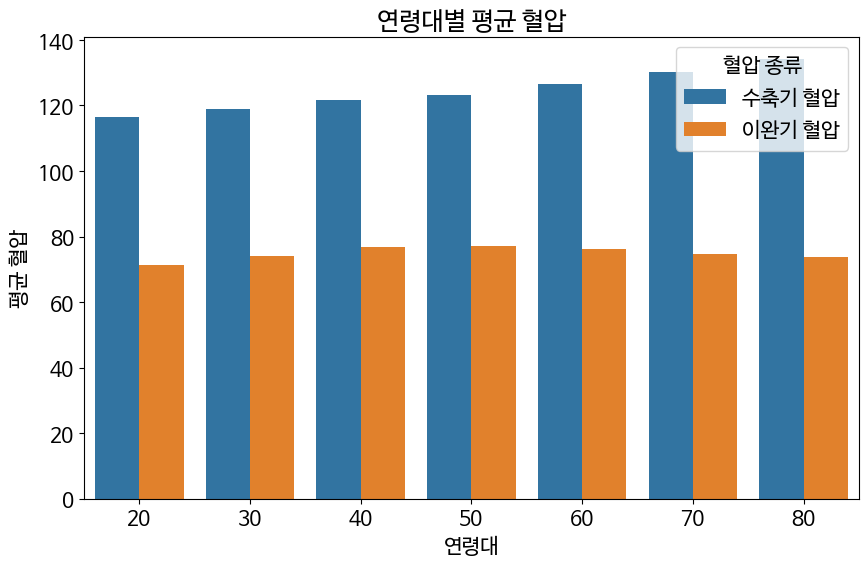

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

age_groups = list(age_blood_pressure.keys())
systolic_avgs = [
    sum(blood_pressure['systolic']) / len(blood_pressure['systolic'])
    if blood_pressure['systolic']
    else 0
    for blood_pressure in age_blood_pressure.values()
]
diastolic_avgs = [
    sum(blood_pressure['diastolic']) / len(blood_pressure['diastolic'])
    if blood_pressure['diastolic']
    else 0
    for blood_pressure in age_blood_pressure.values()
]

data = {
    '연령대': age_groups,
    '수축기 혈압': systolic_avgs,
    '이완기 혈압': diastolic_avgs
}
df = pd.DataFrame(data)


df = pd.melt(df, id_vars=['연령대'], var_name='혈압 종류', value_name='평균 혈압')

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='평균 혈압', hue='혈압 종류', data=df)
plt.title('연령대별 평균 혈압')
plt.xlabel('연령대')
plt.ylabel('평균 혈압')
plt.show()

-> 위 결과를 통해 수축기 혈압은 나이가 증가할수록 점점 증가하는 추세를 보임을 알 수 있다.
고혈압은 18세 이상의 성인에서 수축기 혈압이 140mmHg 이상인 것을 의미하는데, 위 그래프를 통해서 고령층에서 고혈압 증상이 더 많이 발생하는 원인이 나이가 들수록 수축기혈압이 상승하기 때문임을 알 수 있다.

## 분석 2. 남자와 여자의 평균 체중 & 키

In [42]:
age_groups = [20, 30, 40, 50, 60, 70, 80]


age_data = {}
for age in age_groups:
    age_data[age] = {
        'male_heights': [],
        'male_weights': [],
        'female_heights': [],
        'female_weights': []
    }


for i in range(len(리스트표) - 1):
    gender = 리스트표[i + 1][0]
    age = new_연령대[i]

    if age >= 20:  # 10대와 그 이하는 데이터값이 존재하지 않기 때문에 제외했다.
        try:
            height = float(리스트표[i + 1][2])
            weight = float(리스트표[i + 1][3])

            if gender == 1:
                age_data[age]['male_heights'].append(height)
                age_data[age]['male_weights'].append(weight)
            elif gender == 2:
                age_data[age]['female_heights'].append(height)
                age_data[age]['female_weights'].append(weight)
        except ValueError:
            pass


for age in age_groups:
    male_heights = age_data[age]['male_heights']
    male_weights = age_data[age]['male_weights']
    female_heights = age_data[age]['female_heights']
    female_weights = age_data[age]['female_weights']

    age_label = f"{age}대"

    if male_heights and male_weights:
        avg_male_height = sum(male_heights) / len(male_heights)
        avg_male_weight = sum(male_weights) / len(male_weights)
        print(f"{age_label} 남자 평균 키: {avg_male_height:.2f} cm")
        print(f"{age_label} 남자 평균 몸무게: {avg_male_weight:.2f} kg")


    if female_heights and female_weights:
        avg_female_height = sum(female_heights) / len(female_heights)
        avg_female_weight = sum(female_weights) / len(female_weights)
        print(f"{age_label} 여자 평균 키: {avg_female_height:.2f} cm")
        print(f"{age_label} 여자 평균 몸무게: {avg_female_weight:.2f} kg")

    print("-" * 32)

20대 남자 평균 키: 171.56 cm
20대 남자 평균 몸무게: 73.96 kg
20대 여자 평균 키: 159.69 cm
20대 여자 평균 몸무게: 56.52 kg
--------------------------------
30대 남자 평균 키: 172.35 cm
30대 남자 평균 몸무게: 77.03 kg
30대 여자 평균 키: 159.45 cm
30대 여자 평균 몸무게: 57.44 kg
--------------------------------
40대 남자 평균 키: 171.33 cm
40대 남자 평균 몸무게: 74.85 kg
40대 여자 평균 키: 158.30 cm
40대 여자 평균 몸무게: 57.25 kg
--------------------------------
50대 남자 평균 키: 168.70 cm
50대 남자 평균 몸무게: 71.31 kg
50대 여자 평균 키: 155.84 cm
50대 여자 평균 몸무게: 56.31 kg
--------------------------------
60대 남자 평균 키: 165.99 cm
60대 남자 평균 몸무게: 67.90 kg
60대 여자 평균 키: 153.03 cm
60대 여자 평균 몸무게: 55.48 kg
--------------------------------
70대 남자 평균 키: 162.66 cm
70대 남자 평균 몸무게: 63.08 kg
70대 여자 평균 키: 150.53 cm
70대 여자 평균 몸무게: 55.38 kg
--------------------------------
80대 남자 평균 키: 161.51 cm
80대 남자 평균 몸무게: 61.03 kg
80대 여자 평균 키: 147.14 cm
80대 여자 평균 몸무게: 50.83 kg
--------------------------------


- 조금 더 한 눈에 보기 파악하기 쉽게 하기 위해서 막대그래프로 표현해보쟈.

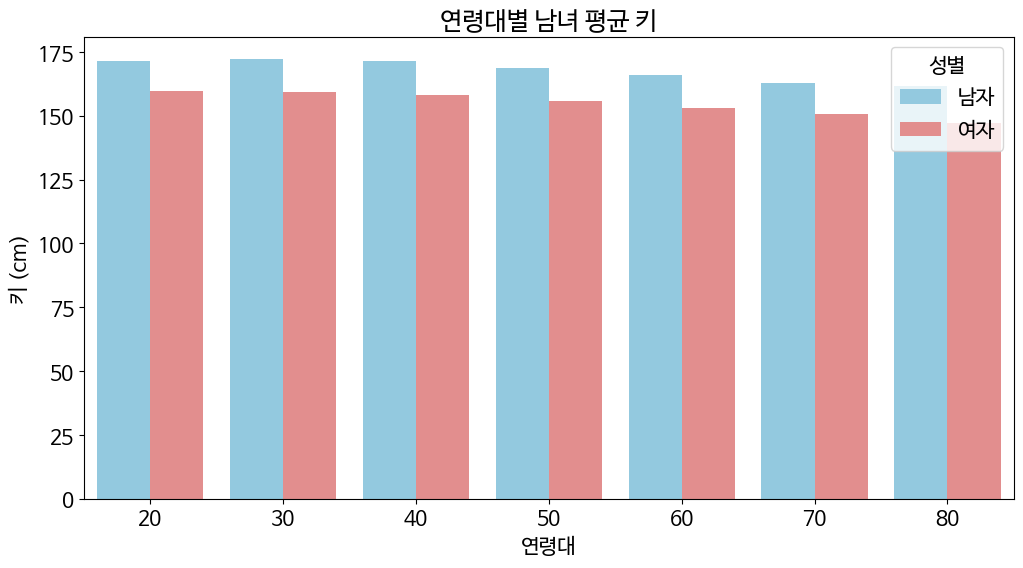

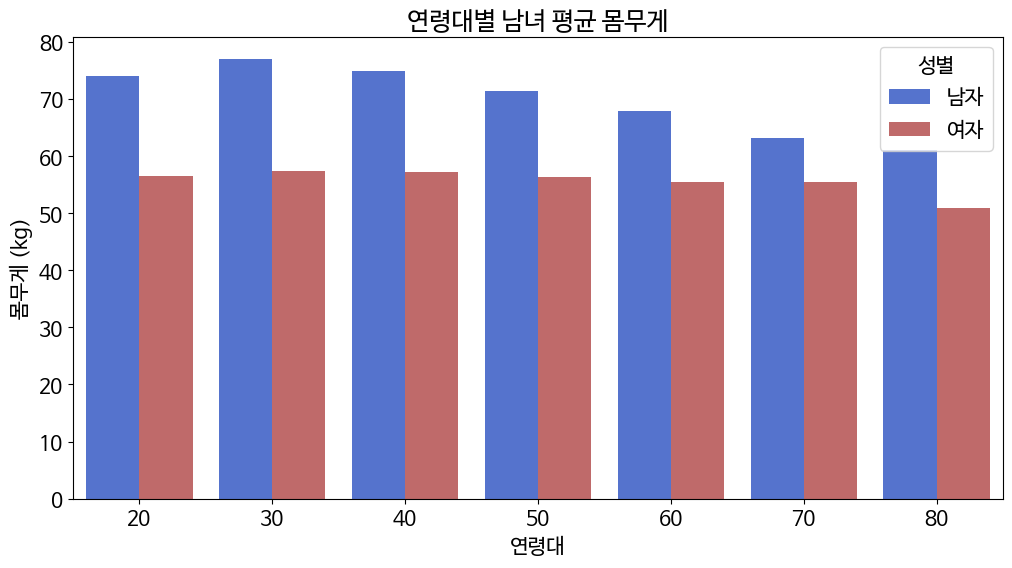

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


age_groups = [20, 30, 40, 50, 60, 70, 80]


data = []
for age in age_groups:
    for gender, label in [(1, 'male'), (2, 'female')]:
        heights = age_data[age][f'{label}_heights']
        weights = age_data[age][f'{label}_weights']
        if heights and weights:

            gender_label = '남자' if gender == 1 else '여자'
            data.append([age, gender_label, '키', np.mean(heights)])
            data.append([age, gender_label, '몸무게', np.mean(weights)])

df = pd.DataFrame(data, columns=['연령대', '성별', '구분', '평균'])

plt.figure(figsize=(12, 6))
sns.barplot(x='연령대', y='평균', hue='성별', data=df[df['구분'] == '키'], palette={'남자': 'skyblue', '여자': 'lightcoral'})
plt.title('연령대별 남녀 평균 키')
plt.ylabel('키 (cm)')

plt.figure(figsize=(12, 6))
sns.barplot(x='연령대', y='평균', hue='성별', data=df[df['구분'] == '몸무게'], palette={'남자': 'royalblue', '여자': 'indianred'})
plt.title('연령대별 남녀 평균 몸무게')
plt.ylabel('몸무게 (kg)')

plt.show()

- 키 :: 키는 남여 모두 동일하게 나이가 들수록 조금씩 감소하고 있다.
- 체중 :: 여자의 체중은 20대부터 80대 이상까지 눈에 띄는 변화는 없지만 80대 이상부터는 비교적 많이 감소하는 모습을 보인다. 남자의 경우 30대가 가장 높고 이후 점차 감소하는 경향을 보인다. 30대로 넘어가면서 아마도 직장 생활 등을 하게 되며 앉아있는 시간이 늘어 체중이 증가하는게 아닐까 싶다.
- 나이가 들수록 체중이나 키는 줄어드는 걸 확인할 수 있었다.

## 분석 3. 음주와 혈압의 관계

* 음주를 하는 사람이 혈압이 더 높게 나타날지 궁금증이 생겨 분석해보려고 한다.

In [16]:
drinkers_systolic_bp = []
non_drinkers_systolic_bp = []

for i in range(len(리스트표) - 1):
    if 리스트표[i + 1][11] == 1:
        try:
            drinkers_systolic_bp.append(float(리스트표[i + 1][8]))
        except ValueError:
            pass
    elif 리스트표[i + 1][11] == 0:
        try:
            non_drinkers_systolic_bp.append(float(리스트표[i + 1][8]))
        except ValueError:
            pass


if drinkers_systolic_bp:
    avg_drinkers_systolic_bp = sum(drinkers_systolic_bp) / len(drinkers_systolic_bp)
    print("음주하는 사람들의 수축기 혈압 평균:", avg_drinkers_systolic_bp)
else:
    print("음주하는 사람들의 데이터가 없습니다.")

if non_drinkers_systolic_bp:
    avg_non_drinkers_systolic_bp = sum(non_drinkers_systolic_bp) / len(non_drinkers_systolic_bp)
    print("음주하지 않는 사람들의 수축기 혈압 평균:", avg_non_drinkers_systolic_bp)
else:
    print("음주하지 않는 사람들의 데이터가 없습니다.")


음주하는 사람들의 수축기 혈압 평균: 122.44391953672661
음주하지 않는 사람들의 수축기 혈압 평균: 123.80948148148148


* 어라, 내가 생각했던 가설과는 다르게 오히려 음주를 하지 않는 사람들의 수축기혈압 평균이 미세하게 더 높게 나와버렸다. 다른 방식으로도 표현해봐야겠다.

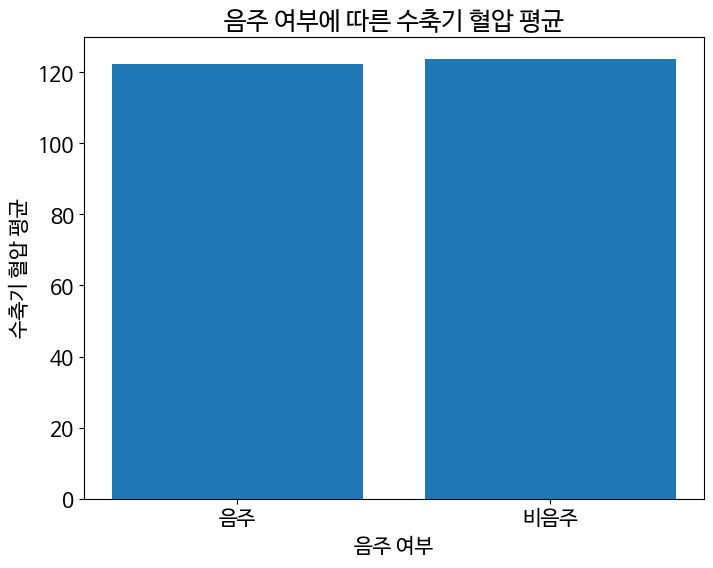

In [17]:
import matplotlib.pyplot as plt
import numpy as np

avg_drinkers_systolic_bp = 0
avg_non_drinkers_systolic_bp = 0

if drinkers_systolic_bp:
    avg_drinkers_systolic_bp = sum(drinkers_systolic_bp) / len(drinkers_systolic_bp)

if non_drinkers_systolic_bp:
    avg_non_drinkers_systolic_bp = sum(non_drinkers_systolic_bp) / len(non_drinkers_systolic_bp)

groups = ['음주', '비음주']
values = [avg_drinkers_systolic_bp, avg_non_drinkers_systolic_bp]

plt.figure(figsize=(8, 6))
plt.bar(groups, values)
plt.title('음주 여부에 따른 수축기 혈압 평균')
plt.xlabel('음주 여부')
plt.ylabel('수축기 혈압 평균')
plt.show()

* 막대그래프로 표현해 보았을 때 당연하게도 위에서 텍스트로 추출한 값이랑 다를 게 없다. 내 가설과는 다르게 평균값으로 보았을 때 음주를 한다고 해서 혈압이 높아지는 것은 아니라는 걸 알 수 있다. 음주와 수축기혈압(고혈압지표)는 큰 상관관계가 존재하지 않는 것 같다.

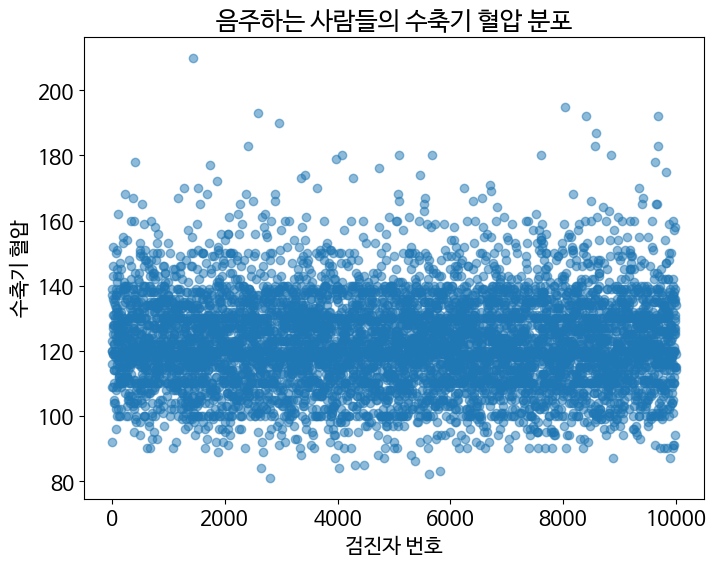

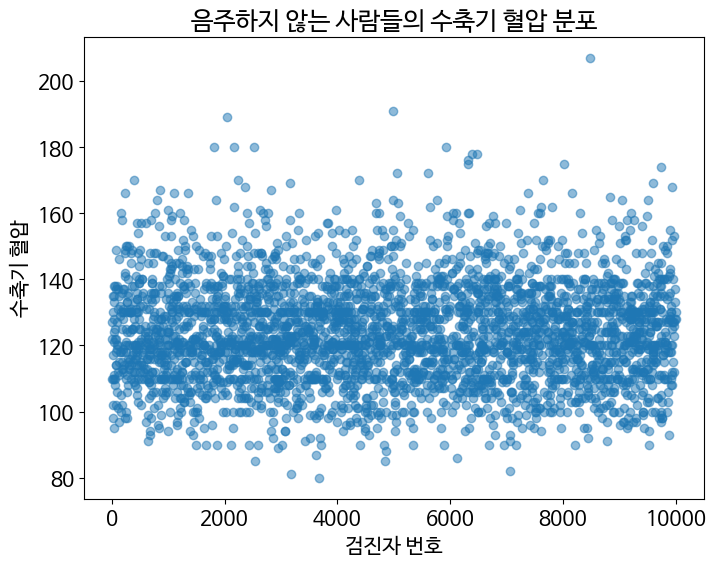

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


drinkers_systolic_bp = []
non_drinkers_systolic_bp = []
drinkers_indices = []
non_drinkers_indices = []

for i in range(len(리스트표) - 1):
    if 리스트표[i + 1][11] == 1:
        try:
            drinkers_systolic_bp.append(float(리스트표[i + 1][8]))
            drinkers_indices.append(i)
        except ValueError:
            pass
    elif 리스트표[i + 1][11] == 0:
        try:
            non_drinkers_systolic_bp.append(float(리스트표[i + 1][8]))
            non_drinkers_indices.append(i)
        except ValueError:
            pass

plt.figure(figsize=(8, 6))
plt.scatter(drinkers_indices, drinkers_systolic_bp, alpha=0.5)
plt.title('음주하는 사람들의 수축기 혈압 분포')
plt.xlabel('검진자 번호')
plt.ylabel('수축기 혈압')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(non_drinkers_indices, non_drinkers_systolic_bp, alpha=0.5)
plt.title('음주하지 않는 사람들의 수축기 혈압 분포')
plt.xlabel('검진자 번호')
plt.ylabel('수축기 혈압')
plt.show()

* 마지막으로 산점도 그래프로 표현해봤다. 최대값과 최소값의 수치, 그리고 음주자와 비음주자의 수 분포를 살펴보기 위함이다.
* 산점도를 통해서 음주자의 점의 개수가 월등하게 많은 것으로 보아 음주자의 비율이 더 높다는 것을 알 수 있었다.
* 미세하게나마 수축기 혈압이 높은 부분에 음주를 하는 사람들의 점이 조금 더 많은 것을 확인할 수 있지만, 이는 앞에서 보았듯 절대적인 인원수가 더 많기 때문에 확정적인 분석으로 이어질 수는 없을 것 같다.

## 분석 4. 연령대 별 시력의 변화

In [19]:
age_vision = {
    20: {'left': [], 'right': []},
    30: {'left': [], 'right': []},
    40: {'left': [], 'right': []},
    50: {'left': [], 'right': []},
    60: {'left': [], 'right': []},
    70: {'left': [], 'right': []},
    80: {'left': [], 'right': []}
}

for i in range(len(new_연령대)):
    age = new_연령대[i]

    if age in age_vision:
        left_value = 리스트표[i + 1][4]
        right_value = 리스트표[i + 1][5]

        try:
            age_vision[age]['left'].append(float(left_value))
            age_vision[age]['right'].append(float(right_value))
        except ValueError:
            pass

for age, vision in age_vision.items():
    left_values = vision['left']
    right_values = vision['right']

    if len(left_values) > 0:
        left_avg = sum(left_values) / len(left_values)
        right_avg = sum(right_values) / len(right_values)

 # 80대에 속하는 부분은 80대 뿐만 아니라 80대 이상의 나이도 포함하기에 따로 표시해야한다.
        if age == 80:
            print(f"80대 이상 좌시력 평균: {left_avg:.2f}")
            print(f"80대 이상 우시력 평균: {right_avg:.2f}")
        else:
            print(f"{age}대 좌시력 평균: {left_avg:.2f}")
            print(f"{age}대 우시력 평균: {right_avg:.2f}")

20대 좌시력 평균: 1.02
20대 우시력 평균: 1.02
30대 좌시력 평균: 1.07
30대 우시력 평균: 1.06
40대 좌시력 평균: 1.03
40대 우시력 평균: 1.03
50대 좌시력 평균: 0.95
50대 우시력 평균: 0.96
60대 좌시력 평균: 0.87
60대 우시력 평균: 0.86
70대 좌시력 평균: 0.81
70대 우시력 평균: 0.80
80대 이상 좌시력 평균: 0.72
80대 이상 우시력 평균: 0.72


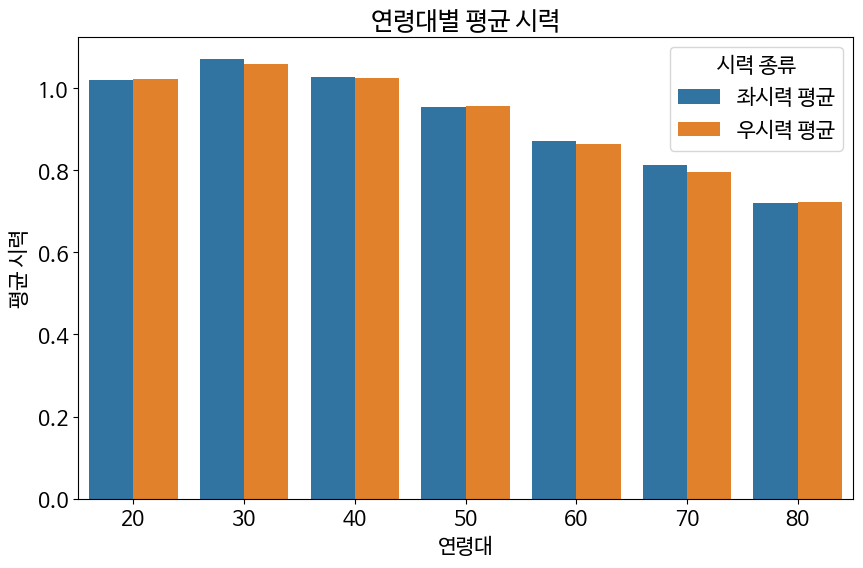

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


age_groups = list(age_vision.keys())
left_avgs = [sum(vision['left']) / len(vision['left']) if vision['left'] else 0 for vision in age_vision.values()]
right_avgs = [sum(vision['right']) / len(vision['right']) if vision['right'] else 0 for vision in age_vision.values()]

data = {
    '연령대': age_groups,
    '좌시력 평균': left_avgs,
    '우시력 평균': right_avgs
}
df = pd.DataFrame(data)

df = pd.melt(df, id_vars=['연령대'], var_name='시력 종류', value_name='평균 시력')

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='평균 시력', hue='시력 종류', data=df)
plt.title('연령대별 평균 시력')
plt.xlabel('연령대')
plt.ylabel('평균 시력')
plt.show()

## 분석 5. 연령대 별 흡연 및 음주 비율

In [21]:
age_groups = {
    20: {'smokers': 0, 'total': 0, 'drinkers': 0},
    30: {'smokers': 0, 'total': 0, 'drinkers': 0},
    40: {'smokers': 0, 'total': 0, 'drinkers': 0},
    50: {'smokers': 0, 'total': 0, 'drinkers': 0},
    60: {'smokers': 0, 'total': 0, 'drinkers': 0},
    70: {'smokers': 0, 'total': 0, 'drinkers': 0},
    80: {'smokers': 0, 'total': 0, 'drinkers': 0}
}


for i in range(len(new_연령대)):
    age = new_연령대[i]
    if age in age_groups:
        age_groups[age]['total'] += 1
        if 리스트표[i + 1][10] in (1, 2):
            age_groups[age]['smokers'] += 1
        if 리스트표[i + 1][11] == 1:
            age_groups[age]['drinkers'] += 1

for age, data in age_groups.items():
    if data['total'] > 0:
        smoking_rate = (data['smokers'] / data['total']) * 100
        drinking_rate = (data['drinkers'] / data['total']) * 100
        if age == 80:
            print(f"80대 이상 흡연 비율: {smoking_rate:.2f}%")
            print(f"80대 이상 음주 비율: {drinking_rate:.2f}%")
        else:
            print(f"{age}대 흡연 비율: {smoking_rate:.2f}%")
            print(f"{age}대 음주 비율: {drinking_rate:.2f}%")
    else:
        if age == 80:
            print("80대 이상 데이터가 없습니다.")
        else:
            print(f"{age}대 데이터가 없습니다.")

20대 흡연 비율: 77.52%
20대 음주 비율: 83.38%
30대 흡연 비율: 80.79%
30대 음주 비율: 82.10%
40대 흡연 비율: 75.73%
40대 음주 비율: 77.42%
50대 흡연 비율: 79.11%
50대 음주 비율: 65.61%
60대 흡연 비율: 84.66%
60대 음주 비율: 49.63%
70대 흡연 비율: 91.18%
70대 음주 비율: 30.23%
80대 이상 흡연 비율: 95.28%
80대 이상 음주 비율: 22.83%


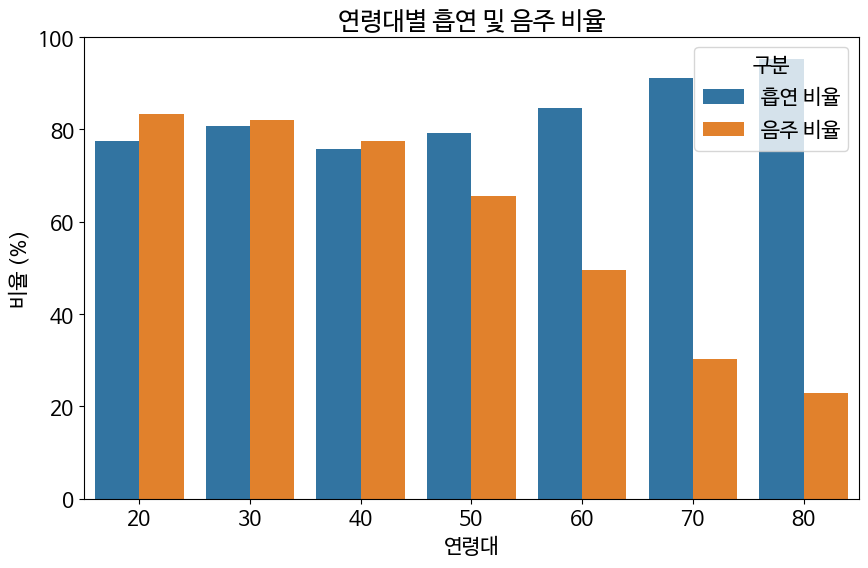

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

age_groups_keys = list(age_groups.keys())
smoking_rates = [(age_groups[age]['smokers'] / age_groups[age]['total']) * 100 if age_groups[age]['total'] > 0 else 0 for age in age_groups_keys]
drinking_rates = [(age_groups[age]['drinkers'] / age_groups[age]['total']) * 100 if age_groups[age]['total'] > 0 else 0 for age in age_groups_keys]

data = {
    '연령대': age_groups_keys,
    '흡연 비율': smoking_rates,
    '음주 비율': drinking_rates
}
df = pd.DataFrame(data)

df = pd.melt(df, id_vars=['연령대'], var_name='구분', value_name='비율')

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='비율', hue='구분', data=df)
plt.title('연령대별 흡연 및 음주 비율')
plt.xlabel('연령대')
plt.ylabel('비율 (%)')
plt.show()

* 20대와 30대에서는 흡연 비율이 약 80% 이상으로 높게 나타난다.
  40대와 50대의 흡연 비율은 조금 감소하지만 여전히 70% 이상을 유지한다.
  60대부터는 흡연 비율이 급격히 감소하여 60대 후반에서는 50% 미만으로 떨어진다.
  70대와 80대에서는 흡연 비율이 가장 낮은 경향을 보인다.
* 음주 비율은 전 연령대에서 흡연 비율에 비해 상대적으로 낮은 편이다.
  20대와 30대에서 가장 높은 음주 비율을 보이며, 60대와 70대에서 약간의 감소가 있다.
  80대에서는 음주 비율이 가장 낮다.

* 전체적으로 흡연 비율은 젊은 연령대에서 높고, 나이가 들수록 감소하는    경향을 보인다.
음주 비율은 젊은 층에서 상대적으로 높은 반면, 나이가 많아질수록 감소하는 경향이 있다.
두 비율 모두 80대에서 가장 낮은 수치를 보이며, 이는 나이가 많아질수록 흡연과 음주 모두 감소하는 경향을 나타낸다.


* 왜 흡연은 늘어나는데 음주는 줄어들까?
- 우리나라는 아무래도 건강에 있어서 흡연보다 음주가 더 나쁘다는 인식이 존재하는 것 같다.
- 젊은 나이대에는 술자리나 모임이 더 많이 이루어지기 때문에 음주가 더 많이 나타나는 것 같다. 간도 건강하니까
- 흡연이 증가하는 이유 중 하나는 전자담배 등 연초? 가 아닌 다른 대체제나 편리함이 있는 새로운 형태의 흡연 문화가 생겨나고 있기 때문이 아닐까 생각한다.
- 전체적으로 음주보다 흡연이 더 많은 이유는 흡연이라는 행동이 음주보다 비용도 더 적게 들고, 시간이나 공간에 크게 구애받지 않기 때문일 것이다.

## 분석 6. BMI(체질량지수)의 분포

+ 공식 == 몸무게 / 키(m)의 제곱

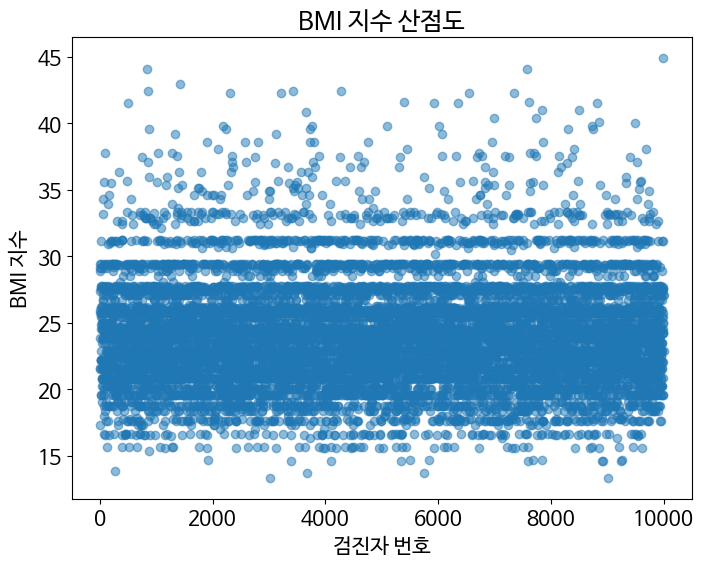

In [23]:
import matplotlib.pyplot as plt

def calculate_bmi(weight, height):

  height_m = height / 100
  bmi = weight / (height_m ** 2)
  return bmi

bmis = []
for i in range(1, len(리스트표)):
    weight = 리스트표[i][3]
    height = 리스트표[i][2]

    try:
        bmi = calculate_bmi(weight, height)
        bmis.append(bmi)
    except (TypeError, ZeroDivisionError):
        pass


plt.figure(figsize=(8, 6))
plt.scatter(range(1, len(bmis) + 1), bmis, alpha=0.5)
plt.title('BMI 지수 산점도')
plt.xlabel('검진자 번호')
plt.ylabel('BMI 지수')
plt.show()

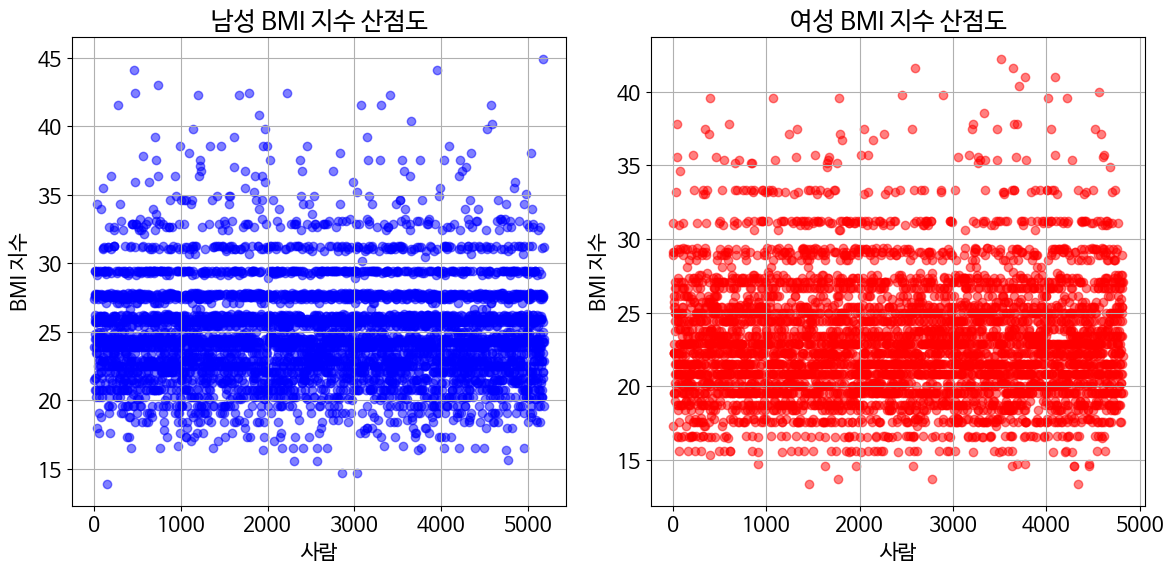

In [25]:
import matplotlib.pyplot as plt

def calculate_bmi(weight, height):
    height_m = height / 100
    bmi = weight / (height_m ** 2)
    return bmi

male_bmis = []
female_bmis = []

for i in range(1, len(리스트표)):
    gender = 리스트표[i][0]
    weight = 리스트표[i][3]
    height = 리스트표[i][2]

    try:
        bmi = calculate_bmi(weight, height)
        if gender == 1:  # 1이 남자로 표기되어 있다.
            male_bmis.append(bmi)
        elif gender == 2:  # 2가 여자로 표기되어 있다.
            female_bmis.append(bmi)
    except (TypeError, ZeroDivisionError):
        pass

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(range(1, len(male_bmis) + 1), male_bmis, alpha=0.5, color='blue')
plt.title('남성 BMI 지수 산점도')
plt.xlabel('사람')
plt.ylabel('BMI 지수')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(range(1, len(female_bmis) + 1), female_bmis, alpha=0.5, color='red')
plt.title('여성 BMI 지수 산점도')
plt.xlabel('사람')
plt.ylabel('BMI 지수')
plt.grid(True)

plt.tight_layout()
plt.show()

- 산점도를 살펴보면 남자와 여자 모두 동일하게 25 부근이 가장 많은 것을 알 수 있다.

- 남자 기준:
  남자 기준 20 ~ 30%가 우리나라 남성의 대다수가 포진되어있는 부분이라고 한다. 그래프에서 마찬가지로 20 ~ 25% 부근 즈음이 가장 많은 것을 알 수 있다. 30 이상부터는 비만이라고 한다.
  이를 통해 봤을 때 우리나라 남성의 대부분은 BMI 정상 평균 수치에 포함되고 있다는 것을 확인할 수 있다.

- 여자기준:
  여자의 경우도 25% 구간이 가장 많은 것을 볼 수 있다. 20 ~ 30% 구간이 보통 외형적으로 봤을 때 너무 통통하지도 마르지도 않은 정도의 체격이라고 한다. 30이 넘을 경우 건강상으로는 문제가 없지만 외형적으로 지방이 좀 붙은 체격이 된다고 한다. 산점도를 통해서 우리나라 여성들은 딱 보통의 체격을 가진 사람들이 가장 많이 존재한다는 것을 알 수 있었다.

부자연스럽게 한 줄로 나타나는 이유는 키와 몸무게를 5 단위로 딱딱 나누어서 표기했기 때문일 것이다.

## 분석 7. 음주와 체중의 상관관계

In [27]:
drinkers_weight = []
non_drinkers_weight = []

for i in range(len(리스트표) - 1):
    if 리스트표[i + 1][11] == 1:  # 음주를 하는 경우는 1로 표기되어있다.
        try:
            drinkers_weight.append(float(리스트표[i + 1][3]))
        except ValueError:
            pass
    elif 리스트표[i + 1][11] == 0:  # 음주를 하지 않는 경우는 0으로 표기되어있다.
        try:
            non_drinkers_weight.append(float(리스트표[i + 1][3]))
        except ValueError:
            pass

if drinkers_weight:
    avg_drinkers_weight = sum(drinkers_weight) / len(drinkers_weight)
    print("음주하는 사람들의 체중 평균:", avg_drinkers_weight)

if non_drinkers_weight:
    avg_non_drinkers_weight = sum(non_drinkers_weight) / len(non_drinkers_weight)
    print("음주하지 않는 사람들의 체중 평균:", avg_non_drinkers_weight)

음주하는 사람들의 체중 평균: 66.6210254069679
음주하지 않는 사람들의 체중 평균: 60.185293259410564


- 내 가설과 동일하게 음주를 하는 사람들이 몸무게가 더 높게 나타났다. 차이를 좀 더 한 눈에 보기 쉽게 하기 위해서 막대그래프를 그려보자.

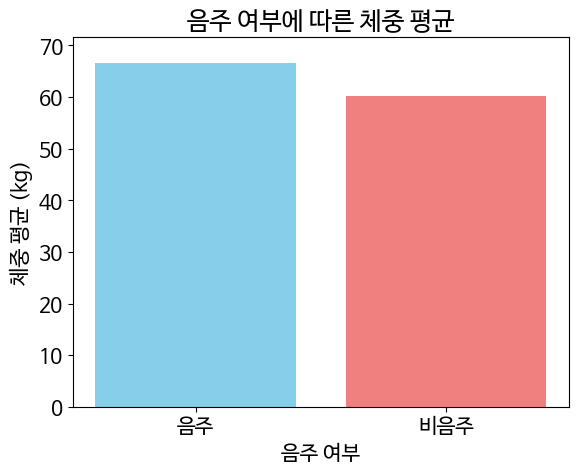

In [35]:
import matplotlib.pyplot as plt
import numpy as np


avg_drinkers_weight = np.mean(drinkers_weight) if drinkers_weight else 0
avg_non_drinkers_weight = np.mean(non_drinkers_weight) if non_drinkers_weight else 0


groups = ['음주', '비음주']
values = [avg_drinkers_weight, avg_non_drinkers_weight]

plt.bar(groups, values, color=['skyblue', 'lightcoral'])
plt.title('음주 여부에 따른 체중 평균')
plt.xlabel('음주 여부')
plt.ylabel('체중 평균 (kg)')
plt.ylim(0, max(values) + 5)
plt.show()

- 술은 그냥 액체임에도 불과하고 생각보다 칼로리가 엄청 높다고 한다. 아무래도 술을 먹게 되면 그와 함께 짜고 자극적인 안주들을 같이 먹게 되기 때문에 음주를 하는 경우의 체중이 그렇지 않은 집단보다 더 높게 나타난 것 같다.
- 약 5 ~ 6 키로 정도 차이만 나기 때문에 별로 크지 않은 수치라고 볼 수도 있겠지만, 데이터 대상이 10000명이기 때문에 유의미한 수치로써 분석할 수 있다.
- 결론적으로 음주와 체중을 양의 상관관계가 있는 것으로 볼 수 있다.

끝!!

교수님 이번 학기도 많은 내용 알려주셔서 정말 감사합니다 :)